# Best Neighborhood In Pittsburgh

## Inroduction
When trying to find the best neighborhood in Pittsburgh, we believe that neighborhood safety should be a major concern. Because of this we chose neighborhood safety to be our metric in determining the best neighborhood. In this project we analyze data on fire reports, drug overdoses, and air quality in the Pittsburgh area to identify the best neighborhoods. Frequent fires can cause damage to nearby buildings meaning if you plan to build in a neighborhood you would want a low number of fire reports. Additionally, drug use can make a community unsafe if the drugs are being abused commonly by the residents so a lower number of drug overdose reports can show a lower amount of drug abuse in an area. Lastly, air quality is important to long term health for residents. Low air quality can cause long term problems to an individual which would make an area unsafe to live. By performing data analysis and visualization, we aim to provide insights that can help residents, policymakers, and community stakeholders make informed decisions.

## Analyzing Fire Reports

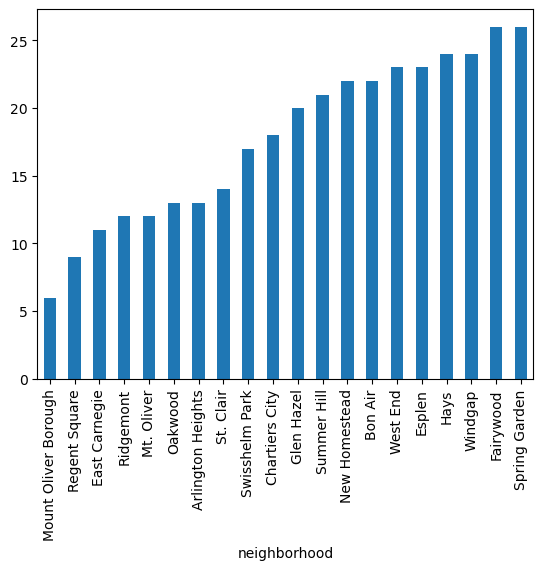

In [47]:
fire_plot = top_fire.plot(kind='bar')

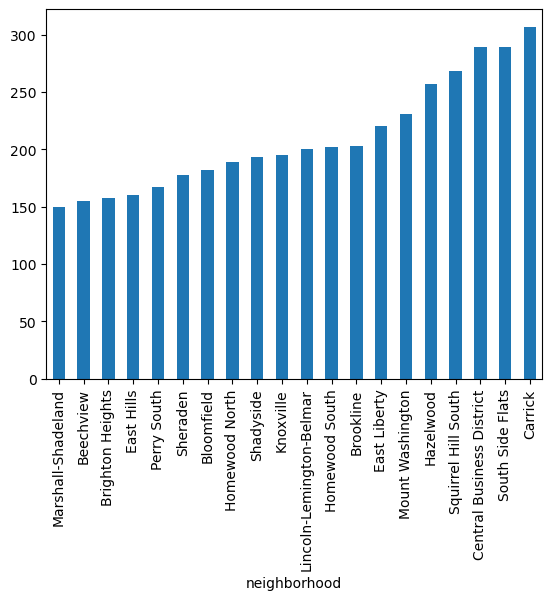

In [132]:
fire_worst_plot = fire_worst.plot(kind='bar')

### Conclusion
* The best neighborhood based on number of fire reports is **Mount Oliver Borough** with the **6** fire reports from 2014 to 2016
* The worst neighborhood based on number of fire reports is **Carrick** with **307** fire reports from 2014 to 2016

## Accidental Overdose

### Worst 20 neighboorhoods 

incident_zip
15210    373
15212    295
15132    220
15136    218
15235    193
15216    189
15221    180
15227    171
15219    163
15206    162
15205    151
15120    146
15202    137
15106    130
15108    128
15211    121
15226    118
15236    112
15025    103
15146     99
dtype: int64

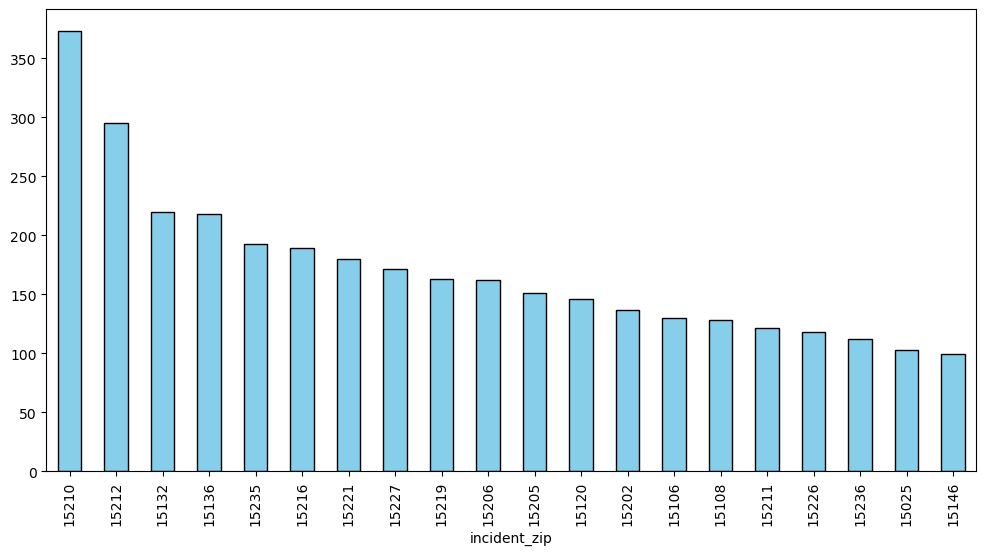

In [147]:
# Group the data by 'incident_zip' 
overdose_sorted = Overdose.groupby('incident_zip').size()

# Get the top 20 ZIP codes with the highest number of incidents
top_20_zip_codes = overdose_sorted.nlargest(20)

# Plot the data as a bar chart
top_20_zip_codes.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')

#Print 
top_20_zip_codes




### Top Best 20 Area Codes 

incident_zip
15668     6
15031     6
15026     6
15656     6
15601     7
15030     7
16066     7
15142     7
15005     7
15613     7
16001     7
15690     7
15074     8
15001     8
15076     8
15085     9
15317    10
15046    10
15135    13
15003    14
Name: count, dtype: int64


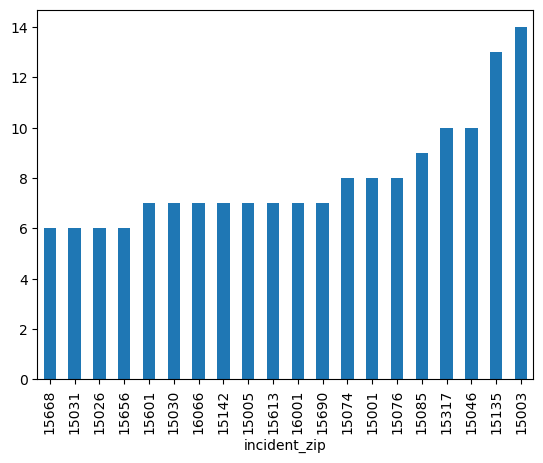

In [155]:
# Count the number of incidents per ZIP code
overdose_counts = Overdose['incident_zip'].value_counts()

# Filter out ZIP codes with more than 5 incident
filtered_counts = overdose_counts[overdose_counts > 5]

# Get the 20 ZIP codes with the least amount of incidents
least_20_zip_codes = filtered_counts.nsmallest(20)

#Plot
Overdose_plot = least_20_zip_codes.plot(kind = 'bar')

# Display the result
print(least_20_zip_codes)



- I used the Zip codes with more than 5 accidents because there was a large population with only 1 accident which is too vague to accurately define which area is safer 

## Conclusion

- The best zip code to live in would be 15668,15031,150 with 6 overdoses 
- The worst zip code to live in would be 15210 with 373 overdoses 

# Analyzing Air Quality

#### Concerns

* Not many neighborhoods are included from the general Pittsburgh area.
* Different parameters are used to identify air quality

#### Points to Note

* So for each neighborhood, different parameters are measured. We can find out the average AQI for each parameter first.

### Grouping Dataset Based on Neighborhood

#### Concerns

* Not all neighborhoods have same parameters.

### Identifying Common Parameter in All Neighborhoods Data

#### Points to Note

* There is no common parameter in all neighborhoods.
*  Even though it is not the most accurate option, we can average out the AQI index of different neighborhoods to identify the lowest average, and that will be the best neighborhood based on Air Quality

### Identifying Lowest AQI Index

In [80]:
neighborhoods_avg_aqi = aqi_data_processed.groupby("site").mean().sort_values(by="index_value")
neighborhoods_avg_aqi

,index_value
site,
Lawrenceville 2,3.054412
West Mifflin,6.335548
Flag Plaza,9.949275
Glassport High Street,17.395508
Liberty,17.944548
North Braddock,18.807318
Parkway East,21.650542
South Fayette,23.854926
Avalon,24.238474


### Conclusion

* According to the dataset, <b>Lawrenceville 2</b> is the best available neighborhood, while Lawrenceville is the worst available neighborhood.
* There is no metadata available to specify these findings further.
* Took the average of available AQI to figure out the best option. This is not favourable as this average included multiple parameters. It would've been better to identify common parameters and find the best available option among that.

### (Optional) Based on AQI Description

* Find the neighborhood with most "Good" description.

In [81]:
aqi_data_processed_good = aqi_data_processed.loc[aqi_data_processed["description"] == "Good"]
aqi_data_processed_good.sample(5)

,site,parameter,index_value,description
30572,Lawrenceville,OZONE,38,Good
26781,Lawrenceville,PM25B,42,Good
58712,Harrison Township,OZONE,44,Good
63712,North Braddock,PM25_640,23,Good
40258,Liberty 2,PM10,9,Good


aqi_data_processed_good.groupby("site")["description"].count()

* Accordingly, <b>Avalon</b> has the most number of "Good" description.

### Final Remarks

* The Dataset used is not ideal to identify the best neighborhood in general Pittsburgh area.
* No common parameter is available for comparison, and hence the conclusion was made by simply taking the average of existing findings.
* (Optional) The conclusion made from the "Optional" section is invalid as it could also mean that Avalon had more areas compared to West Mifflin. This can be further convincing when we look at the average AQI, where West Mifflin ranks higher than Avalon by significant amount (6.3 and 24.2).

 # Overall Conclusion

* From our three metrics none of our best neighborhoods are the same. Because of this we will have to move down the list to find the area that ranked highest on average.
* From the drug overdose data we found that the zip code **15031** is tied for the safest zip code. **15031** covers and area named **Cuddy, PA**.
* **Cuddy, PA** is located inside of **South Fayette, PA**, which ranked eighth overall for best air quality meaning for these two metrics the best Neighborhood is **South Fayette**
* The fire report data did not include **South Fayette**, however just outside of **South Fayette** is **East Carnegie** which ranked third overall in fewest fire reports.
* Based on these metrics we found **South Fayette** to be the best neighborhood in Pittsburgh because it is the safest.
st.
